In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('E:/python/vishnu/Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.describe(percentiles=(0.5,0.7,0.8,0.9,0.95,0.99))

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
70%,7000.30000,1.574046e+07,704.000000,42.000000,7.000000,122029.870000,2.000000,1.00000,1.000000,139432.236000,0.000000
80%,8000.20000,1.576582e+07,735.000000,46.000000,8.000000,133710.358000,2.000000,1.00000,1.000000,159836.726000,1.000000
90%,9000.10000,1.579083e+07,778.000000,53.000000,9.000000,149244.792000,2.000000,1.00000,1.000000,179674.704000,1.000000
95%,9500.05000,1.580303e+07,812.000000,60.000000,9.000000,162711.669000,2.000000,1.00000,1.000000,190155.375500,1.000000
99%,9900.01000,1.581311e+07,850.000000,72.000000,10.000000,185967.985400,3.000000,1.00000,1.000000,198069.734500,1.000000


In [6]:
#df.sort_values(by='EstimatedSalary')

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Density'>

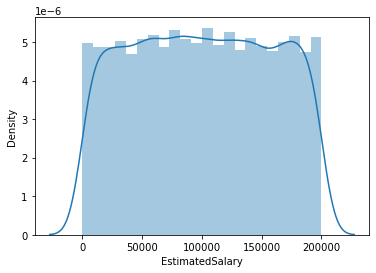

In [7]:
sns.distplot(df['EstimatedSalary'])

In [8]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1, inplace=True)

In [9]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [11]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [12]:
df.Gender=df.Gender.apply(lambda x:1 if x=='Male' else 0)

In [13]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


In [14]:
df.Gender.unique()

array([0, 1], dtype=int64)

In [15]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [16]:
geo=pd.get_dummies(df.Geography, drop_first=True)

In [17]:
#pd.get_dummies(df.Geography, drop_first=True)

#def(x):
 #   if x=='Germany':
   #     return 1:
  #  elif x=='Spain'
    #    return 2:
   # else:
    #    return 3  

In [18]:
geo

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [19]:
df=pd.concat([df,geo],axis=1)

In [20]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain
0,619,France,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,France,0,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0,0,0
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0,0,0
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1,0,0
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1,1,0


In [21]:
df.drop('Geography', axis=1,inplace=True)

In [22]:
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,0,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,0,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,0,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,1,0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Gender           10000 non-null  int64  
 2   Age              10000 non-null  int64  
 3   Tenure           10000 non-null  int64  
 4   Balance          10000 non-null  float64
 5   NumOfProducts    10000 non-null  int64  
 6   HasCrCard        10000 non-null  int64  
 7   IsActiveMember   10000 non-null  int64  
 8   EstimatedSalary  10000 non-null  float64
 9   Exited           10000 non-null  int64  
 10  Germany          10000 non-null  uint8  
 11  Spain            10000 non-null  uint8  
dtypes: float64(2), int64(8), uint8(2)
memory usage: 800.9 KB


In [24]:
X= df.drop('Exited',axis=1)
y=df['Exited']

In [25]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
X_train.shape

(8000, 11)

In [27]:
X_train

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain
9254,686,1,32,6,0.00,2,1,1,179093.26,0,0
1561,632,1,42,4,119624.60,2,1,1,195978.86,1,0
1670,559,1,24,3,114739.92,1,1,0,85891.02,0,1
6087,561,0,27,9,135637.00,1,1,0,153080.40,0,0
6669,517,1,56,9,142147.32,1,0,0,39488.04,0,0
...,...,...,...,...,...,...,...,...,...,...,...
5734,768,1,54,8,69712.74,1,1,1,69381.05,0,0
5191,682,0,58,1,0.00,1,1,1,706.50,0,0
5390,735,0,38,1,0.00,3,0,0,92220.12,0,0
860,667,1,43,8,190227.46,1,1,0,97508.04,0,0


In [28]:
X_test.shape

(2000, 11)

In [29]:
X_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain
9254,686,1,32,6,0.00,2,1,1,179093.26,0,0
1561,632,1,42,4,119624.60,2,1,1,195978.86,1,0
1670,559,1,24,3,114739.92,1,1,0,85891.02,0,1
6087,561,0,27,9,135637.00,1,1,0,153080.40,0,0
6669,517,1,56,9,142147.32,1,0,0,39488.04,0,0


In [30]:
X_test.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain
6252,596,1,32,3,96709.07,2,0,0,41788.37,1,0
4684,623,1,43,1,0.00,2,1,1,146379.30,0,0
1731,601,0,44,4,0.00,2,1,0,58561.31,0,1
4742,506,1,59,8,119152.10,2,1,1,170679.74,1,0
4521,560,0,27,7,124995.98,1,1,1,114669.79,0,1


In [31]:
y_test

6252    0
4684    0
1731    0
4742    0
4521    0
       ..
6412    1
8285    0
7853    1
1095    1
6929    1
Name: Exited, Length: 2000, dtype: int64

In [32]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [33]:
logitreg=LogisticRegression()

In [34]:
logitreg.fit(X_train,y_train)
y_pred=logitreg.predict(X_test)

In [35]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [36]:
accuracy_score(y_pred,y_test)

0.811

In [37]:
tel=pd.read_csv("E:/python/vishnu/Customer-Churn.csv")


In [38]:
tel.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [39]:
tel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [40]:
tel.shape

(7043, 21)

In [41]:
tel.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [42]:
tel.drop(['customerID'],axis=1, inplace=True)

In [43]:
tel

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [44]:
tel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [45]:
tel.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [46]:
for col in tel.columns:
    print(col,"----->\t\t ",tel[col].unique())

gender ----->		  ['Female' 'Male']
SeniorCitizen ----->		  [0 1]
Partner ----->		  ['Yes' 'No']
Dependents ----->		  ['No' 'Yes']
tenure ----->		  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService ----->		  ['No' 'Yes']
MultipleLines ----->		  ['No phone service' 'No' 'Yes']
InternetService ----->		  ['DSL' 'Fiber optic' 'No']
OnlineSecurity ----->		  ['No' 'Yes' 'No internet service']
OnlineBackup ----->		  ['Yes' 'No' 'No internet service']
DeviceProtection ----->		  ['No' 'Yes' 'No internet service']
TechSupport ----->		  ['No' 'Yes' 'No internet service']
StreamingTV ----->		  ['No' 'Yes' 'No internet service']
StreamingMovies ----->		  ['No' 'Yes' 'No internet service']
Contract ----->		  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ----->		  ['Yes' 'No']
PaymentMethod ----->		  ['Ele

In [47]:
vars=['PhoneService','Partner','Churn','PaperlessBilling','Dependents']
def bin_map(x):
    return x.map({'Yes':1, 'No':0 })
tel[vars]=tel[vars].apply(bin_map)
    

In [48]:
tel.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.5,0
2,Male,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [49]:
for col in tel.columns:
    print(col,"----->\t\t ",tel[col].unique())

gender ----->		  ['Female' 'Male']
SeniorCitizen ----->		  [0 1]
Partner ----->		  [1 0]
Dependents ----->		  [0 1]
tenure ----->		  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService ----->		  [0 1]
MultipleLines ----->		  ['No phone service' 'No' 'Yes']
InternetService ----->		  ['DSL' 'Fiber optic' 'No']
OnlineSecurity ----->		  ['No' 'Yes' 'No internet service']
OnlineBackup ----->		  ['Yes' 'No' 'No internet service']
DeviceProtection ----->		  ['No' 'Yes' 'No internet service']
TechSupport ----->		  ['No' 'Yes' 'No internet service']
StreamingTV ----->		  ['No' 'Yes' 'No internet service']
StreamingMovies ----->		  ['No' 'Yes' 'No internet service']
Contract ----->		  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ----->		  [1 0]
PaymentMethod ----->		  ['Electronic check' 'Mailed check

In [50]:
for col in tel.columns:
    print(col,"----->\t\t ",tel[col].unique())

gender ----->		  ['Female' 'Male']
SeniorCitizen ----->		  [0 1]
Partner ----->		  [1 0]
Dependents ----->		  [0 1]
tenure ----->		  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService ----->		  [0 1]
MultipleLines ----->		  ['No phone service' 'No' 'Yes']
InternetService ----->		  ['DSL' 'Fiber optic' 'No']
OnlineSecurity ----->		  ['No' 'Yes' 'No internet service']
OnlineBackup ----->		  ['Yes' 'No' 'No internet service']
DeviceProtection ----->		  ['No' 'Yes' 'No internet service']
TechSupport ----->		  ['No' 'Yes' 'No internet service']
StreamingTV ----->		  ['No' 'Yes' 'No internet service']
StreamingMovies ----->		  ['No' 'Yes' 'No internet service']
Contract ----->		  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ----->		  [1 0]
PaymentMethod ----->		  ['Electronic check' 'Mailed check

In [51]:
#only Data type obj is found
for col in tel.columns:
    if tel[col].dtype=='O':
        print(col,'--->\t\t',tel[col].unique())
 

gender --->		 ['Female' 'Male']
MultipleLines --->		 ['No phone service' 'No' 'Yes']
InternetService --->		 ['DSL' 'Fiber optic' 'No']
OnlineSecurity --->		 ['No' 'Yes' 'No internet service']
OnlineBackup --->		 ['Yes' 'No' 'No internet service']
DeviceProtection --->		 ['No' 'Yes' 'No internet service']
TechSupport --->		 ['No' 'Yes' 'No internet service']
StreamingTV --->		 ['No' 'Yes' 'No internet service']
StreamingMovies --->		 ['No' 'Yes' 'No internet service']
Contract --->		 ['Month-to-month' 'One year' 'Two year']
PaymentMethod --->		 ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges --->		 ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']


In [52]:
for col in tel.columns:
    print(col,"----->\t\t ",len(tel[col].unique()))

gender ----->		  2
SeniorCitizen ----->		  2
Partner ----->		  2
Dependents ----->		  2
tenure ----->		  73
PhoneService ----->		  2
MultipleLines ----->		  3
InternetService ----->		  3
OnlineSecurity ----->		  3
OnlineBackup ----->		  3
DeviceProtection ----->		  3
TechSupport ----->		  3
StreamingTV ----->		  3
StreamingMovies ----->		  3
Contract ----->		  3
PaperlessBilling ----->		  2
PaymentMethod ----->		  4
MonthlyCharges ----->		  1585
TotalCharges ----->		  6531
Churn ----->		  2


In [53]:
 #only Data type obj is found
for col in tel.columns:
    if tel[col].dtype=='O':
        print(col,'--->\t\t',len(tel[col].unique()))

gender --->		 2
MultipleLines --->		 3
InternetService --->		 3
OnlineSecurity --->		 3
OnlineBackup --->		 3
DeviceProtection --->		 3
TechSupport --->		 3
StreamingTV --->		 3
StreamingMovies --->		 3
Contract --->		 3
PaymentMethod --->		 4
TotalCharges --->		 6531


In [54]:
#tel.gender=tel.gender.apply(lambda x:1 if x=='Male' else 0)

In [55]:
for col in tel.columns:
    if tel[col].dtype=='O':
        print(col,'--->\t\t',tel[col].unique())
 

gender --->		 ['Female' 'Male']
MultipleLines --->		 ['No phone service' 'No' 'Yes']
InternetService --->		 ['DSL' 'Fiber optic' 'No']
OnlineSecurity --->		 ['No' 'Yes' 'No internet service']
OnlineBackup --->		 ['Yes' 'No' 'No internet service']
DeviceProtection --->		 ['No' 'Yes' 'No internet service']
TechSupport --->		 ['No' 'Yes' 'No internet service']
StreamingTV --->		 ['No' 'Yes' 'No internet service']
StreamingMovies --->		 ['No' 'Yes' 'No internet service']
Contract --->		 ['Month-to-month' 'One year' 'Two year']
PaymentMethod --->		 ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges --->		 ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']


In [56]:
vars=['gender','InternetService','PaymentMethod','Contract']
d=pd.get_dummies(tel[vars],drop_first=True)
d

,gender_Male,InternetService_Fiber optic,InternetService_No,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_One year,Contract_Two year
0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,1,1,0
2,1,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0
4,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...
7038,1,0,0,0,0,1,1,0
7039,0,1,0,1,0,0,1,0
7040,0,0,0,0,1,0,0,0
7041,1,1,0,0,0,1,0,0


In [57]:
tel=pd.concat([tel,d],axis=1)

In [58]:
tel.drop(vars,axis=1,inplace=True)

In [59]:
for col in tel.columns:
    if tel[col].dtype=='O':
        print(col,'--->\t\t',tel[col].unique())

MultipleLines --->		 ['No phone service' 'No' 'Yes']
OnlineSecurity --->		 ['No' 'Yes' 'No internet service']
OnlineBackup --->		 ['Yes' 'No' 'No internet service']
DeviceProtection --->		 ['No' 'Yes' 'No internet service']
TechSupport --->		 ['No' 'Yes' 'No internet service']
StreamingTV --->		 ['No' 'Yes' 'No internet service']
StreamingMovies --->		 ['No' 'Yes' 'No internet service']
TotalCharges --->		 ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']


In [60]:
vars=['OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','OnlineSecurity']
for col in vars:
    d=pd.get_dummies(tel[col],prefix=col)
    d.drop(col+'_No internet service', axis=1, inplace=True)
    tel=pd.concat([tel,d],axis=1)
tel.drop(vars, inplace=True, axis=1    )
tel.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,OnlineSecurity_No,OnlineSecurity_Yes
0,0,1,0,1,0,No phone service,1,29.85,29.85,0,...,1,0,1,0,1,0,1,0,1,0
1,0,0,0,34,1,No,0,56.95,1889.5,0,...,0,1,1,0,1,0,1,0,0,1
2,0,0,0,2,1,No,1,53.85,108.15,1,...,1,0,1,0,1,0,1,0,0,1
3,0,0,0,45,0,No phone service,0,42.30,1840.75,0,...,0,1,0,1,1,0,1,0,0,1
4,0,0,0,2,1,No,1,70.70,151.65,1,...,1,0,1,0,1,0,1,0,1,0


In [61]:
for col in tel.columns:
    if tel[col].dtype=='O':
        print(col,'--->\t\t',tel[col].unique())

MultipleLines --->		 ['No phone service' 'No' 'Yes']
TotalCharges --->		 ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']


In [62]:
tel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   Partner                                7043 non-null   int64  
 2   Dependents                             7043 non-null   int64  
 3   tenure                                 7043 non-null   int64  
 4   PhoneService                           7043 non-null   int64  
 5   MultipleLines                          7043 non-null   object 
 6   PaperlessBilling                       7043 non-null   int64  
 7   MonthlyCharges                         7043 non-null   float64
 8   TotalCharges                           7043 non-null   object 
 9   Churn                                  7043 non-null   int64  
 10  gender_Male                            7043 non-null   uint8  
 11  Inte

In [63]:
d=pd.get_dummies(tel['MultipleLines'],prefix='MultipleLines')
d.drop('MultipleLines_No phone service', inplace=True,axis=1)
tel=pd.concat([tel,d],axis=1)
tel.drop('MultipleLines',inplace=True, axis=1)

In [64]:
for col in tel.columns:
    if tel[col].dtype=='O':
        print(col,'--->\t\t',tel[col].unique())

TotalCharges --->		 ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']


In [65]:
tel['TotalCharges']=pd.to_numeric(tel['TotalCharges'],errors='coerce' )

In [66]:
tel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   Partner                                7043 non-null   int64  
 2   Dependents                             7043 non-null   int64  
 3   tenure                                 7043 non-null   int64  
 4   PhoneService                           7043 non-null   int64  
 5   PaperlessBilling                       7043 non-null   int64  
 6   MonthlyCharges                         7043 non-null   float64
 7   TotalCharges                           7032 non-null   float64
 8   Churn                                  7043 non-null   int64  
 9   gender_Male                            7043 non-null   uint8  
 10  InternetService_Fiber optic            7043 non-null   uint8  
 11  Inte

In [67]:
tel.dropna(inplace=True)

In [68]:
tel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7032 non-null   int64  
 1   Partner                                7032 non-null   int64  
 2   Dependents                             7032 non-null   int64  
 3   tenure                                 7032 non-null   int64  
 4   PhoneService                           7032 non-null   int64  
 5   PaperlessBilling                       7032 non-null   int64  
 6   MonthlyCharges                         7032 non-null   float64
 7   TotalCharges                           7032 non-null   float64
 8   Churn                                  7032 non-null   int64  
 9   gender_Male                            7032 non-null   uint8  
 10  InternetService_Fiber optic            7032 non-null   uint8  
 11  Inte

In [69]:
tel.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Male,...,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,OnlineSecurity_No,OnlineSecurity_Yes,MultipleLines_No,MultipleLines_Yes
0,0,1,0,1,0,1,29.85,29.85,0,0,...,1,0,1,0,1,0,1,0,0,0
1,0,0,0,34,1,0,56.95,1889.50,0,1,...,1,0,1,0,1,0,0,1,1,0
2,0,0,0,2,1,1,53.85,108.15,1,1,...,1,0,1,0,1,0,0,1,1,0
3,0,0,0,45,0,0,42.30,1840.75,0,1,...,0,1,1,0,1,0,0,1,0,0
4,0,0,0,2,1,1,70.70,151.65,1,0,...,1,0,1,0,1,0,1,0,1,0


In [70]:
X=tel.drop('Churn',axis=1)
y=tel['Churn']

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

In [72]:
X_train.shape

(4922, 30)

In [73]:
X_train.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,gender_Male,InternetService_Fiber optic,...,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,OnlineSecurity_No,OnlineSecurity_Yes,MultipleLines_No,MultipleLines_Yes
1247,0,1,1,24,1,0,83.15,2033.05,0,1,...,1,0,1,0,1,0,1,0,0,1
4374,0,1,1,71,1,1,19.60,1387.45,1,0,...,0,0,0,0,0,0,0,0,1,0
6630,1,0,0,16,1,1,78.75,1218.25,1,1,...,1,0,1,0,0,1,1,0,1,0
1969,0,0,0,60,0,0,53.60,3237.05,0,0,...,1,0,0,1,0,1,0,1,0,0
2085,1,1,0,32,1,1,93.20,2931.00,0,1,...,1,0,0,1,0,1,1,0,0,1


In [74]:
# Some Data are biggest no. are are convreted into a small no. other wise 0 and 1 format.This calles as Feacture scalling EX-TotalCharges

In [75]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
vars=['tenure','MonthlyCharges','TotalCharges']
X_train[vars]=sc.fit_transform(X_train[vars])

In [76]:
X_train.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,gender_Male,InternetService_Fiber optic,...,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,OnlineSecurity_No,OnlineSecurity_Yes,MultipleLines_No,MultipleLines_Yes
1247,0,1,1,-0.336349,1,0,0.617823,-0.103302,0,1,...,1,0,1,0,1,0,1,0,0,1
4374,0,1,1,1.569519,1,1,-1.497814,-0.388915,1,0,...,0,0,0,0,0,0,0,0,1,0
6630,1,0,0,-0.660752,1,1,0.471343,-0.463769,1,1,...,1,0,1,0,0,1,1,0,1,0
1969,0,0,0,1.123465,0,0,-0.365923,0.429347,0,0,...,1,0,0,1,0,1,0,1,0,0
2085,1,1,0,-0.011946,1,1,0.952397,0.293951,0,1,...,1,0,0,1,0,1,1,0,0,1


In [77]:
X_test[vars]=sc.fit_transform(X_test[vars])

In [78]:
X_test.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,gender_Male,InternetService_Fiber optic,...,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,OnlineSecurity_No,OnlineSecurity_Yes,MultipleLines_No,MultipleLines_Yes
3940,0,0,0,-0.565352,0,1,-1.329492,-0.812968,1,0,...,1,0,1,0,1,0,1,0,0,0
3346,1,0,0,-1.265937,1,1,0.621844,-0.936754,0,1,...,1,0,1,0,0,1,1,0,0,1
143,0,0,0,1.289141,1,1,0.630127,1.300862,1,1,...,1,0,1,0,1,0,0,1,0,1
4204,1,0,0,-1.142305,1,1,0.671539,-0.839212,1,1,...,1,0,1,0,0,1,1,0,1,0
4386,0,1,1,0.918242,1,0,-0.256091,0.317481,1,0,...,0,1,1,0,1,0,0,1,1,0


<AxesSubplot:>

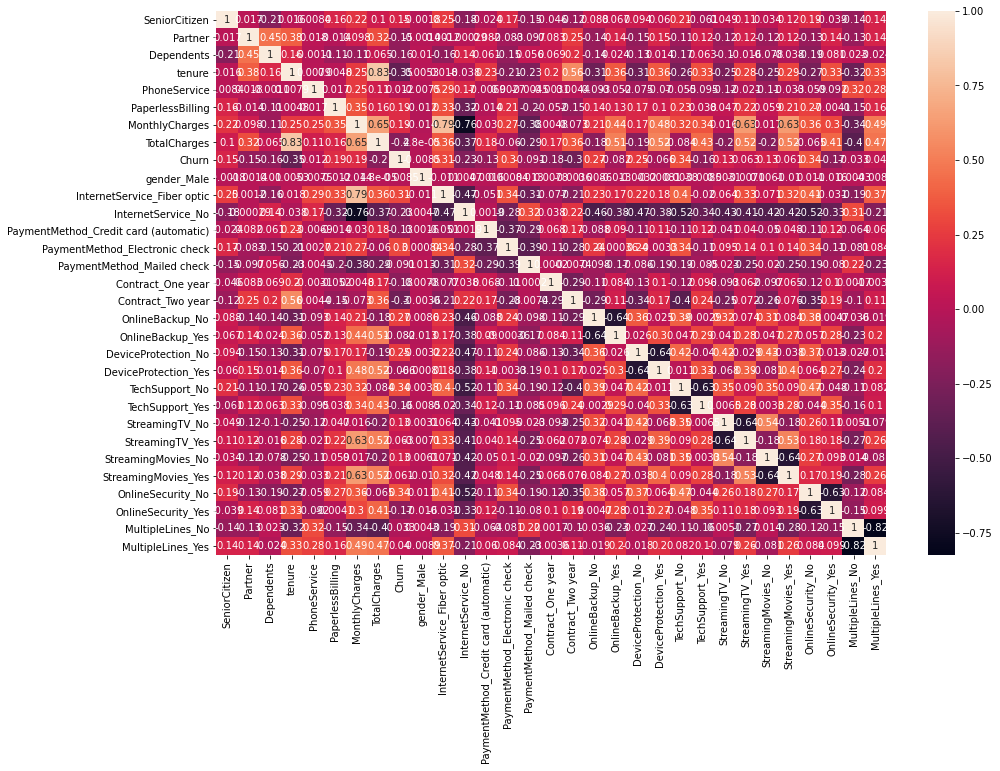

In [79]:
plt.figure(figsize=(15,10))
sns.heatmap(tel.corr(),annot=True)

In [80]:
import statsmodels.api as sm
logm1=sm.GLM(y_train, sm.add_constant(X_train), family=sm.families.Binomial())
res=logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2002.1
Date:                Wed, 15 Dec 2021   Deviance:                       4004.2
Time:                        10:17:41   Pearson chi2:                 5.82e+03
No. Iterations:                    14                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.9274      1.165     -2.513      0.012      -5.210      -0.644
SeniorCitizen                             0.2430      0.102      2.393      0.017       0.044       0.442
Partner                                   0.0775      0.095      0.818      0.413      -0.108       0.263
Dependents                               -0.2654      0.110     -2.412      0.016      -0.481      -0.050
tenure                                   -1.6339      0.191     -8.534      0.000      -2.009      -1.259
PhoneService                              0.6230      0.579      1.075      0.282      -0.512       1.759
PaperlessBilling                          0.2631      0.090      2.920      0.003       0.087       0.440
MonthlyCharges                           -1.8896      1.140     -1.657      0.097      -4.125       0.345
TotalCharges                              0.8367      0.198      4.233      0.000       0.449       1.224
gender_Male                              -0.0928      0.078     -1.186      0.236      -0.246       0.061
InternetService_Fiber optic               2.3249      0.955      2.435      0.015       0.453       4.197
InternetService_No                       -3.0059      1.301     -2.311      0.021      -5.556      -0.456
PaymentMethod_Credit card (automatic)    -0.0143      0.139     -0.103      0.918      -0.286       0.257
PaymentMethod_Electronic check            0.3359      0.115      2.910      0.004       0.110       0.562
PaymentMethod_Mailed check               -0.0580      0.139     -0.416      0.678      -0.331       0.215
Contract_One year                        -0.6556      0.130     -5.032      0.000      -0.911      -0.400
Contract_Two year                        -1.3401      0.216     -6.192      0.000      -1.764      -0.916
OnlineBackup_No                          -0.0466      0.054     -0.862      0.389      -0.153       0.059
OnlineBackup_Yes                          0.1252      0.170      0.735      0.462      -0.209       0.459
DeviceProtection_No                      -0.1107      0.055     -2.003      0.045      -0.219      -0.002
DeviceProtection_Yes                      0.1892      0.171      1.106      0.269      -0.146       0.525
TechSupport_No                            0.0818      0.059      1.386      0.166      -0.034       0.197
TechSupport_Yes                          -0.0032      0.174     -0.018      0.985      -0.344       0.337
StreamingTV_No                           -0.3999      0.131     -3.043      0.002      -0.657      -0.142
StreamingTV_Yes                           0.4785      0.264      1.812      0.070      -0.039       0.996
StreamingMovies_No                       -0.3529      0.131     -2.696      0.007      -0.609      -0.096
Streaming

In [81]:
y_train_pred=res.predict(sm.add_constant(X_train))
y_train_pred[:10]

1247    0.238880
4374    0.001255
6630    0.673734
1969    0.025240
2085    0.724170
3060    0.235172
6823    0.291794
5820    0.021915
1006    0.578352
5975    0.538373
dtype: float64

In [82]:
y_train_pred=y_train_pred.values.reshape(-1)
y_train_pred

array([0.23887961, 0.00125524, 0.67373427, ..., 0.06943502, 0.08108691,
       0.04844967])

In [83]:
y_train_pred_final=pd.DataFrame({'Churn':y_train.values, 'Churn_prob':y_train})
y_train_pred_final['CustID']=y_train.index

In [84]:
y_train_pred_final['predicted']=y_train_pred_final.Churn_prob.map(lambda x:1 if x>0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_prob,CustID,predicted
1247,0,0,1247,0
4374,0,0,4374,0
6630,0,0,6630,0
1969,0,0,1969,0
2085,1,1,2085,1


In [85]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

1.0

In [86]:
confusion_matrix (y_train_pred_final.Churn, y_train_pred_final.predicted)

array([[3633,    0],
       [   0, 1289]], dtype=int64)

In [87]:
cm=confusion_matrix(y_train_pred_final.Churn,y_train_pred_final.predicted)

In [88]:
TP=cm[1,1]
TN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]

In [89]:
TP

1289

In [90]:
TN

3633

In [91]:
FP

0

In [92]:
FN

0

In [93]:
precision=TP/(TP+FP)

In [94]:
precision

1.0

In [95]:
acc=(TP+TN)/(TP+TN+FP+FN)

In [96]:
acc


1.0

In [97]:
recall=TP/(TP+FN)
recall

1.0

In [98]:
logreg=LogisticRegression()

from sklearn.feature_selection import RFE # remove unused Data
ref=RFE(logreg, 15) # 15 is 15 Data are selected
ref=ref.fit(X_train, y_train)

In [99]:
ref

RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [100]:
ref.support_

array([ True, False, False,  True, False,  True,  True,  True, False,
        True,  True, False,  True, False,  True,  True, False, False,
       False, False,  True, False, False,  True, False,  True,  True,
       False,  True, False])

In [101]:
list(zip(X_train.columns,ref.support_,ref.ranking_))

[('SeniorCitizen', True, 1),
 ('Partner', False, 8),
 ('Dependents', False, 2),
 ('tenure', True, 1),
 ('PhoneService', False, 4),
 ('PaperlessBilling', True, 1),
 ('MonthlyCharges', True, 1),
 ('TotalCharges', True, 1),
 ('gender_Male', False, 7),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', True, 1),
 ('PaymentMethod_Credit card (automatic)', False, 16),
 ('PaymentMethod_Electronic check', True, 1),
 ('PaymentMethod_Mailed check', False, 13),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('OnlineBackup_No', False, 5),
 ('OnlineBackup_Yes', False, 12),
 ('DeviceProtection_No', False, 10),
 ('DeviceProtection_Yes', False, 9),
 ('TechSupport_No', True, 1),
 ('TechSupport_Yes', False, 6),
 ('StreamingTV_No', False, 11),
 ('StreamingTV_Yes', True, 1),
 ('StreamingMovies_No', False, 15),
 ('StreamingMovies_Yes', True, 1),
 ('OnlineSecurity_No', True, 1),
 ('OnlineSecurity_Yes', False, 3),
 ('MultipleLines_No', True, 1),
 ('MultipleLines_Yes', Fals

In [102]:
X_train.columns[~ref.support_]

Index(['Partner', 'Dependents', 'PhoneService', 'gender_Male',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'OnlineBackup_No', 'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingMovies_No', 'OnlineSecurity_Yes', 'MultipleLines_Yes'],
      dtype='object')

In [103]:
cols=X_train.columns[ref.support_ ]

In [104]:
cols

Index(['SeniorCitizen', 'tenure', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'InternetService_Fiber optic', 'InternetService_No',
       'PaymentMethod_Electronic check', 'Contract_One year',
       'Contract_Two year', 'TechSupport_No', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'OnlineSecurity_No', 'MultipleLines_No'],
      dtype='object')

In [105]:
cols

Index(['SeniorCitizen', 'tenure', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'InternetService_Fiber optic', 'InternetService_No',
       'PaymentMethod_Electronic check', 'Contract_One year',
       'Contract_Two year', 'TechSupport_No', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'OnlineSecurity_No', 'MultipleLines_No'],
      dtype='object')

In [106]:
len(cols)

15

In [107]:
import statsmodels.api as sm
X_train_sm=sm.add_constant(X_train[cols])
logm1=sm.GLM(y_train,X_train_sm, family=sm.families.Binomial())
res=logm1.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4906
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2007.1
Date:                Wed, 15 Dec 2021   Deviance:                       4014.2
Time:                        10:17:45   Pearson chi2:                 5.94e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -2.6384      0.171    -15.461      0.000      -2.973      -2.304
SeniorCitizen                      0.2945      0.099      2.962      0.003       0.100       0.489
tenure                            -1.6310      0.188     -8.670      0.000      -2.000      -1.262
PaperlessBilling                   0.2722      0.090      3.032      0.002       0.096       0.448
MonthlyCharges                    -0.4928      0.189     -2.602      0.009      -0.864      -0.122
TotalCharges                       0.8391      0.196      4.286      0.000       0.455       1.223
InternetService_Fiber optic        1.1936      0.221      5.406      0.000       0.761       1.626
InternetService_No                -0.3953      0.268     -1.477      0.140      -0.920       0.129
PaymentMethod_Electronic check     0.3630      0.083      4.367      0.000       0.200       0.526
Contract_One year                 -0.6616      0.129     -5.115      0.000      -0.915      -0.408
Contract_Two year                 -1.3538      0.215     -6.292      0.000      -1.776      -0.932
TechSupport_No                     0.3193      0.107      2.974      0.003       0.109       0.530
StreamingTV_Yes                    0.4136      0.115      3.591      0.000       0.188       0.639
StreamingMovies_Yes                0.3351      0.114      2.947      0.003       0.112       0.558
OnlineSecurity_No                  0.4515      0.107      4.212      0.000       0.241       0.662
MultipleLines_No                  -0.2920      0.088     -3.324      0.001      -0.464      -0.120
==================================================================================================
"""

In [108]:
y_train_pred=res.predict(X_train_sm)
y_train_pred[:5]

1247    0.235391
4374    0.001420
6630    0.680278
1969    0.020773
2085    0.690213
dtype: float64

In [109]:
y_train_pred=y_train_pred.values.reshape(-1)
y_train_pred[:5]

array([0.23539079, 0.00142028, 0.68027799, 0.02077319, 0.69021322])

In [110]:
y_train_pred_final=pd.DataFrame({'Churn':y_train.values, 'Churn_prob':y_train})
y_train_pred_final['CustID']=y_train.index

In [111]:
#threshold=[0.2,0.3,0.4,0.5,0.6]
y_train_pred_final["predicted"]=y_train_pred_final.Churn_prob.map(lambda X:1 if X>0.4 else 0)
y_train_pred_final.head()

,Churn,Churn_prob,CustID,predicted
1247,0,0,1247,0
4374,0,0,4374,0
6630,0,0,6630,0
1969,0,0,1969,0
2085,1,1,2085,1


In [112]:
accuracy_score(y_train_pred_final.Churn,y_train_pred_final.predicted)

1.0

In [113]:
#Decision Tree 
#Random Forest

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
df=pd.read_csv("E:/python/vishnu/AdultIncome.csv")
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df.income.unique()

array(['<=50K', '>50K'], dtype=object)

In [5]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [7]:
len(df)

48842

In [8]:
len(df.drop_duplicates())

48790

In [9]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
48837    False
48838    False
48839    False
48840    False
48841    False
Length: 48842, dtype: bool

In [10]:
df[df.age==27]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
128,27,Self-emp-not-inc,115438,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,60,Ireland,>50K
151,27,Private,221561,11th,7,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,32,United-States,<=50K
199,27,Private,132267,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,>50K
264,27,Private,116372,Masters,14,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States,<=50K
345,27,Private,106562,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,50,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48480,27,Private,100669,Some-college,10,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,Philippines,>50K
48544,27,Private,176761,HS-grad,9,Never-married,Craft-repair,Other-relative,Other,Male,0,0,40,Nicaragua,<=50K
48764,27,Private,155382,Some-college,10,Never-married,Other-service,Not-in-family,White,Female,0,0,25,United-States,<=50K
48801,27,Private,177398,HS-grad,9,Never-married,Other-service,Unmarried,White,Female,0,0,64,United-States,<=50K


In [11]:
df[(df.age==27) & (df.education=='HS-grad') & (df['marital-status']=='Never-married')].head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
510,27,Private,104423,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K
1265,27,Private,72443,HS-grad,9,Never-married,Tech-support,Not-in-family,White,Male,0,0,40,United-States,<=50K
1537,27,Private,118598,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,Black,Female,0,0,35,United-States,<=50K
1754,27,Private,151382,HS-grad,9,Never-married,Exec-managerial,Own-child,White,Male,0,0,40,United-States,<=50K
1839,27,Private,181822,HS-grad,9,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [12]:
df.drop(['fnlwgt','educational-num','occupation','relationship','capital-gain','capital-loss','native-country'],axis=1,inplace=True)

In [13]:
df

,age,workclass,education,marital-status,race,gender,hours-per-week,income
0,25,Private,11th,Never-married,Black,Male,40,<=50K
1,38,Private,HS-grad,Married-civ-spouse,White,Male,50,<=50K
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,White,Male,40,>50K
3,44,Private,Some-college,Married-civ-spouse,Black,Male,40,>50K
4,18,?,Some-college,Never-married,White,Female,30,<=50K
...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,Married-civ-spouse,White,Female,38,<=50K
48838,40,Private,HS-grad,Married-civ-spouse,White,Male,40,>50K
48839,58,Private,HS-grad,Widowed,White,Female,40,<=50K
48840,22,Private,HS-grad,Never-married,White,Male,20,<=50K


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   education       48842 non-null  object
 3   marital-status  48842 non-null  object
 4   race            48842 non-null  object
 5   gender          48842 non-null  object
 6   hours-per-week  48842 non-null  int64 
 7   income          48842 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.0+ MB


In [15]:
df.isnull().sum()

age               0
workclass         0
education         0
marital-status    0
race              0
gender            0
hours-per-week    0
income            0
dtype: int64

In [16]:
df2=df.drop_duplicates()

In [17]:
df2.head(10)

,age,workclass,education,marital-status,race,gender,hours-per-week,income
0,25,Private,11th,Never-married,Black,Male,40,<=50K
1,38,Private,HS-grad,Married-civ-spouse,White,Male,50,<=50K
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,White,Male,40,>50K
3,44,Private,Some-college,Married-civ-spouse,Black,Male,40,>50K
4,18,?,Some-college,Never-married,White,Female,30,<=50K
5,34,Private,10th,Never-married,White,Male,30,<=50K
6,29,?,HS-grad,Never-married,Black,Male,40,<=50K
7,63,Self-emp-not-inc,Prof-school,Married-civ-spouse,White,Male,32,>50K
8,24,Private,Some-college,Never-married,White,Female,40,<=50K
9,55,Private,7th-8th,Married-civ-spouse,White,Male,10,<=50K


In [18]:
df.head(10)

,age,workclass,education,marital-status,race,gender,hours-per-week,income
0,25,Private,11th,Never-married,Black,Male,40,<=50K
1,38,Private,HS-grad,Married-civ-spouse,White,Male,50,<=50K
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,White,Male,40,>50K
3,44,Private,Some-college,Married-civ-spouse,Black,Male,40,>50K
4,18,?,Some-college,Never-married,White,Female,30,<=50K
5,34,Private,10th,Never-married,White,Male,30,<=50K
6,29,?,HS-grad,Never-married,Black,Male,40,<=50K
7,63,Self-emp-not-inc,Prof-school,Married-civ-spouse,White,Male,32,>50K
8,24,Private,Some-college,Never-married,White,Female,40,<=50K
9,55,Private,7th-8th,Married-civ-spouse,White,Male,10,<=50K


In [19]:
len(df)

48842

In [20]:
len(df2)

29168

In [21]:
df[(df.age==27) & (df.education=='10th')]

,age,workclass,education,marital-status,race,gender,hours-per-week,income
938,27,Self-emp-not-inc,10th,Never-married,White,Female,48,<=50K
1104,27,Private,10th,Never-married,White,Female,38,<=50K
1989,27,Private,10th,Divorced,White,Male,40,<=50K
2827,27,Private,10th,Never-married,White,Male,75,<=50K
3640,27,Private,10th,Married-civ-spouse,White,Male,40,<=50K
5324,27,Private,10th,Divorced,White,Female,40,<=50K
9532,27,Private,10th,Never-married,Black,Male,40,<=50K
12480,27,Private,10th,Never-married,White,Male,40,<=50K
13925,27,Private,10th,Never-married,White,Male,40,<=50K
14563,27,Private,10th,Married-civ-spouse,Black,Female,30,<=50K


In [22]:
df[(df.age==27) & (df.education=='HS-grad') & (df['marital-status']=='Never-married')]

,age,workclass,education,marital-status,race,gender,hours-per-week,income
510,27,Private,HS-grad,Never-married,White,Male,40,<=50K
1265,27,Private,HS-grad,Never-married,White,Male,40,<=50K
1537,27,Private,HS-grad,Never-married,Black,Female,35,<=50K
1754,27,Private,HS-grad,Never-married,White,Male,40,<=50K
1839,27,Private,HS-grad,Never-married,White,Male,40,<=50K
...,...,...,...,...,...,...,...,...
47793,27,Private,HS-grad,Never-married,White,Female,50,>50K
47953,27,Private,HS-grad,Never-married,White,Male,40,<=50K
48243,27,Private,HS-grad,Never-married,Black,Male,40,<=50K
48544,27,Private,HS-grad,Never-married,Other,Male,40,<=50K


In [23]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29168 entries, 0 to 48841
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             29168 non-null  int64 
 1   workclass       29168 non-null  object
 2   education       29168 non-null  object
 3   marital-status  29168 non-null  object
 4   race            29168 non-null  object
 5   gender          29168 non-null  object
 6   hours-per-week  29168 non-null  int64 
 7   income          29168 non-null  object
dtypes: int64(2), object(6)
memory usage: 2.0+ MB


In [24]:
dfgetd=pd.get_dummies(df, drop_first=True)
dfgetd

,age,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,...,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Male,income_>50K
0,25,40,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
1,38,50,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,28,40,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
3,44,40,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
4,18,30,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,38,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48838,40,40,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
48839,58,40,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
48840,22,20,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0


In [25]:
dfgetd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 37 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   age                                   48842 non-null  int64
 1   hours-per-week                        48842 non-null  int64
 2   workclass_Federal-gov                 48842 non-null  uint8
 3   workclass_Local-gov                   48842 non-null  uint8
 4   workclass_Never-worked                48842 non-null  uint8
 5   workclass_Private                     48842 non-null  uint8
 6   workclass_Self-emp-inc                48842 non-null  uint8
 7   workclass_Self-emp-not-inc            48842 non-null  uint8
 8   workclass_State-gov                   48842 non-null  uint8
 9   workclass_Without-pay                 48842 non-null  uint8
 10  education_11th                        48842 non-null  uint8
 11  education_12th                        488

In [26]:
X=dfgetd.iloc[:, :-1]
y=dfgetd['income_>50K']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [103]:
dt= DecisionTreeClassifier(criterion="gini")
rf=RandomForestClassifier(n_estimators=100)    #100 IS tree

In [104]:
dt.fit(X_train,y_train)
rf.fit(X_train, y_train)

RandomForestClassifier()

In [105]:
#y_pred_dt=dt.predict(X_test)
#y_pred_rf=rf.predict(X_test)

## test


In [106]:
y_pred_dt=dt.predict(X_test)
test_acc=accuracy_score(y_test,y_pred_dt)
print("test_accuracy is :",test_acc)
print("----------------------------")
clf_repot=classification_report(y_test,y_pred_dt)
print("clf meterix",clf_repot)

print("---------------------------")
confusion_matrix(y_test,y_pred_dt)

test_accuracy is : 0.7932745998262811
----------------------------
clf meterix               precision    recall  f1-score   support

           0       0.85      0.88      0.87     12316
           1       0.57      0.50      0.53      3802

    accuracy                           0.79     16118
   macro avg       0.71      0.69      0.70     16118
weighted avg       0.79      0.79      0.79     16118

---------------------------


array([[10871,  1445],
       [ 1887,  1915]], dtype=int64)

## train Accuracy


In [107]:
y_pred_train=dt.predict(X_train)
train_accu=accuracy_score(y_train,y_pred_train)
print('train Accuracy',train_accu)
confusion_matrix(y_train,y_pred_train)
print("-------------------------------")
clf_matrix=classification_report(y_pred_train,y_train)
print("Clf matrix",clf_matrix)
print("------------------")

confusion_matrix(y_train,y_pred_train)


train Accuracy 0.9270871531597604
-------------------------------
Clf matrix               precision    recall  f1-score   support

           0       0.97      0.93      0.95     25947
           1       0.78      0.91      0.84      6777

    accuracy                           0.93     32724
   macro avg       0.88      0.92      0.90     32724
weighted avg       0.93      0.93      0.93     32724

------------------


array([[24200,   639],
       [ 1747,  6138]], dtype=int64)

In [111]:
from sklearn.tree import plot_tree
plt.figure(figsize=(200,100))
tree=plot_tree(decision_tree=dt,feature_names=dfgetd.columns,class_names=['0','1'],filled=True)

Error in callback <function flush_figures at 0x000002902F3863A0> (for post_execute):


KeyboardInterrupt: 

## Hyperparameter Tuning
1.GridSearchDv

In [57]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [115]:
hyperparameter={'criterion':['gini',"entropy"],
               'max_depth':np.arange(2,10),
               'min_samples_split':np.arange(2,21),
               'min_samples_leaf':np.arange(1,15),
               }
dt=DecisionTreeClassifier()
dt_GCV_model=GridSearchCV(dt,hyperparameter,cv=5)
dt_GCV_model.fit(X_train,y_train)

KeyboardInterrupt: 